# Trabajo Practico N1 Redes convolucionales

Alzheimer MRI Preprocessed Dataset (128 x 128)

The Data is collected from several websites/hospitals/public repositories.\
The Dataset is consists of Preprocessed MRI (Magnetic Resonance Imaging) Images.\
All the images are resized into 128 x 128 pixels.\
The Dataset has four classes of images.\
The Dataset is consists of total 6400 MRI images.
* Class - 1: Mild Demented (896 images)
* Class - 2: Moderate Demented (64 images)
* Class - 3: Non Demented (3200 images)
* Class - 4: Very Mild Demented (2240 images)

Motive
The main motive behind sharing this dataset is to design/develop an accurate framework or architecture for the classification of Alzheimers Disease.

References

* https://adni.loni.usc.edu/
* https://www.alzheimers.net/
* https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers
* https://ieeexplore.ieee.org/document/9521165
* https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data
* https://www.nature.com/articles/s41598-020-79243-9
* https://cordis.europa.eu/article/id/429468-the-final-epad-dataset-is-now-available-on-the-alzheimer-s-disease-workbench

### Ejercicio 1: Hiperparámetros
A. Modificar la cantidad de canales (filtros) de la capa convolucional, el tamaño del kernel (filtro) y el tamaño del kernel de la capa de max pooling de modo tal que la red siga funcionando. Explicar la relación entre estas dimensiones entre sí y también la relación con el tamaño de la entrada de la capa lineal.\
B. Incorporar padding y stride distintos a los valores por defecto. Explicar en qué consisten.\
C. Dibujar la curva de la función costo en función de los pasos de entrenamiento. Variar el valor de la constante de aprendizaje y comentar si se observan diferencias en el comportamiento de la curva.\
D. Cambiar el parámetro batch_size y explicar por qué varía la cantidad de pasos en el entrenamiento al modificar este parámetro.\
E. Aumentar la cantidad de epochs. Observar cómo se comportan las curvas de aprendizaje.\
F. Agregar una capa convolucional, una capa de max pooling y una capa lineal de modo que la red siga funcionando. Explicar la elección de dimensiones para que la red sea funcional.\
G. Reemplazar la red convolucional por un perceptrón multicapa. Variar la cantidad de capas y neuronas y comparar los resultados.\

### Ejercicio 2: Regularización
A. Implementar dropout y penalidad L2. Explicar ambos conceptos.

### Ejercicio 3: Validación
A. Armar un set de validación separando parte del set de entrenamiento.\
B. Implementar early stopping. Explicar para qué sirve.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.cuda
import torchvision
import splitfolders

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.io import read_image

from utils import train_model, compute_confusion_matrix

from plot_utils import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix

### Realizamos una separacion del Dataset en 80% para entrenamiento, 10% para test y 10% para validacion.

In [5]:
splitfolders.ratio('Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [00:04, 1320.36 files/s]


In [6]:
NUM_EPOCAS = 3
valid_size = 0.2
batch_size = 1

In [7]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

transform = transforms.ToTensor()

train_data = datasets.ImageFolder(root='output/train',transform=transform)


test_data = datasets.ImageFolder(root='output/test',transform=transform)


val_data = datasets.ImageFolder(root='output/val',transform=transform)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           num_workers=0)

valid_loader = torch.utils.data.DataLoader(val_data,
                                           batch_size=batch_size,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=0)

In [13]:
train_loader.dataset.classes

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [14]:
train_data

Dataset ImageFolder
    Number of datapoints: 5125
    Root location: output/train
    StandardTransform
Transform: ToTensor()

## Visualizacion

In [ ]:
import os
 
# assign directory
directory = 'Dataset'
imagefiles = ()
# iterate over files in
# that directory
for root, dirs, files in os.walk(directory):
    for filename in files:
        imagefiles = (os.path.join(root, filename))
imagefiles

In [ ]:
#on = read_image('non_1000.jpg')
#mild = read_image('verymild_1000.jpg')
#ild = read_image('verymild_1000.jpg')
#oderate = read_image('verymild_1000.jpg')

for i in train_data:
    for i in 'Non_Demented':
        non = read_image('non_1000.jpg')
    #for i in 'Very_Mild_Demented':
        vmild = read_image('verymild_1000.jpg')
    #for i in 'Mild_Demented':
        mild = read_image('verymild_1000.jpg')
    #for i in 'Moderate_Demented':
        moderate = read_image('verymild_1000.jpg')
        for i in non,vmild,mild,moderate:
            img = T.ToPILImage()(img)
            img.show()

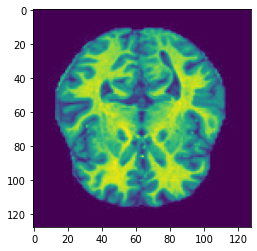

In [27]:
non = read_image('Dataset\\Non_Demented\\non_1000.jpg')
non = (transforms.ToPILImage()(non))
vmild = read_image('Dataset\\Very_Mild_Demented\\verymild_1000.jpg')
vmild = (transforms.ToPILImage()(vmild))
mild = read_image('Dataset\\Mild_Demented\\mild_200.jpg')
mild = (transforms.ToPILImage()(mild))
moderate = read_image('Dataset\\Moderate_Demented\\moderate_10.jpg')
moderate = (transforms.ToPILImage()(moderate))

plt.imshow((non))

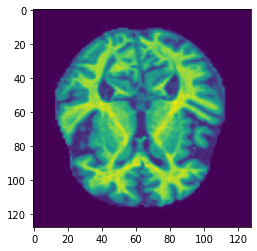

In [28]:
plt.imshow((vmild))

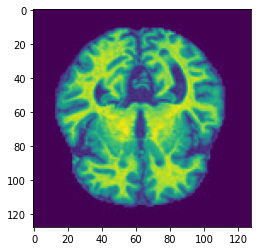

In [29]:
plt.imshow((mild))

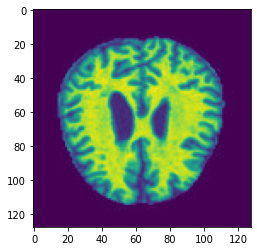

In [30]:
plt.imshow((moderate))

In [1]:
plt.figure(figsize=(10, 10))
for images, labels in train_data:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

NameError: name 'plt' is not defined

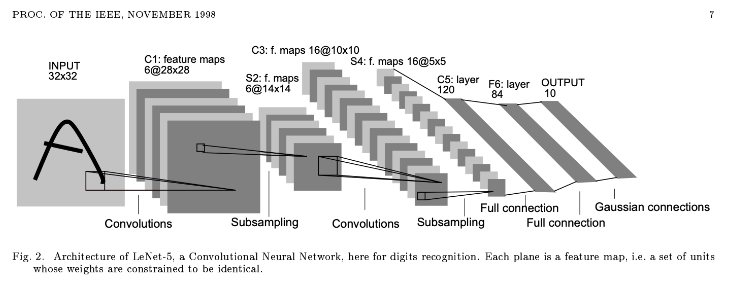

## Desarrollo de la Red Neuronal

Conceptos de nuestra red.
Tenemos 6400 imagenes de espectro RGB.\
Vamos a seguir la estructura de LeNet5. Consiste en:
* Red Neuronal Convolucional a la cual le aplicamos features de 5x5. \
Por lo cual nuestra estructura recorre las 128 posiciones filtrando de a 5x5, haciendo la multiplicacion matricial de dicha matriz, sumando los valores internos y generando una nueva matriz conformada por todos esos escalares individuales.\
Si nuestra red comienza con 128x128x3, se realiza la convolucion. Output = [128 (input) - 5 (filter) + 0 (padding) / 1 (stride)] + 1 = 124\
Planteamos 6 convoluciones diferentes de filtros de 5x5. Por lo que llegamos a 124x124x6
* Aplicamos la funcion de activacion no lineal ReLu (Rectified Linear Unit)
* Maxpooling de dimension 2x2 que divide nuestra red en 6 capas de dimension 62x62.


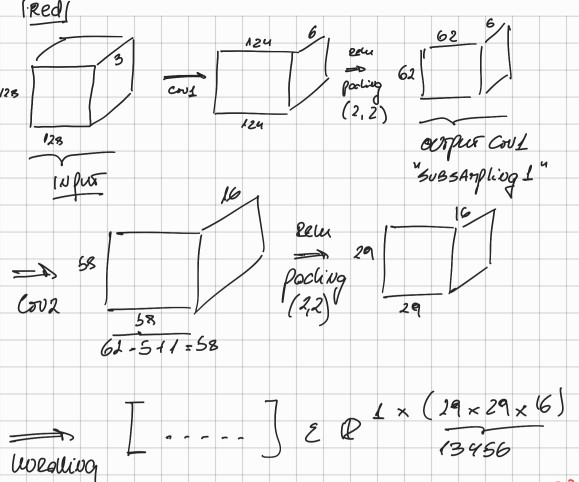

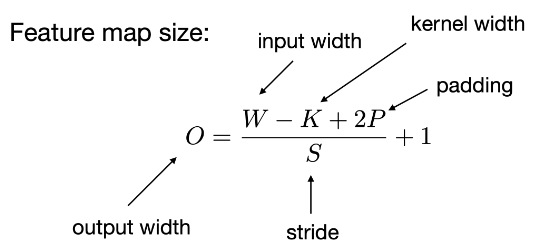

features es filtro, cada filtro tiene dimensiones 5 x 5, osea 25 parametros por filtro
tenemos 6 filtros de 5x5, osea 6x25 = 150 parametros

si nuestra imagen tiene 128 x 128, aplicamos la convolucion que agarra un sector de 5x5 hace la multiplicacion matricial y suma los valores de la mtriz, generando un escalar de 1. esos sectores de 5x5 cuantas veces lo haces? las que entre? es en base al stride? para sacar la dimension de la nueva imagen, es 128/5 ??? cual seria el tamaño de la nueva imagen.
eso se hace 6 veces random? osea llegas a 6 nuevas imagenes que son matrices formadas por escalares convolucionados.


In [95]:
NUM_EPOCAS = 3
valid_size = 0.2
batch_size = 1

In [23]:
class LeNet5(nn.Module):

    def __init__(self, n_canales_rgb, n_clases):
        super().__init__()
        # Los canales representan la dimension de la imagen, al ser RGB tiene 3. Red, Green, Blue.
        # Las clases representan la cantidad de clases que tenemos en nuestro dataset. En nuestro caso es Non, VMild, Mild, Moderate.
        self.n_canales_rgb = n_canales_rgb
        self.n_clases = n_clases
        # Le net tiene dos capas convolucionales
        # La primer capa toma como canales de entrada RGB = 3, le aplicamos una convolucion con kerneles de 5x5 
        self.conv1 = nn.Conv2d(in_channels = self.n_canales_rgb, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5) 
        # y tres capas de MLPs
        self.fc1 = torch.nn.Linear(13456, 120)
        self.fc2 = torch.nn.Linear(13456, 84)
        self.fc3 = torch.nn.Linear(84, self.n_clases)

    def forward(self, x):
        # capa convolucional
        x = self.conv1(x)
        # al resultado de la convolucion, le aplica una ReLu
        x = F.relu(x)
        # y luego un pooling
        x = F.max_pool2d(x, (2, 2))
        
        # Segunda capa convolucional
        x = self.conv2(x)
        # aplica relu
        x = F.relu(x)
        # pooling 
        x = F.max_pool2d(x, (2,2))
        
        # flatten de las imagenes para pasarlo a MLPs
        x = torch.flatten(x, 1)
        # MLPs con relus
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        print(x.shape)
        
        return x

La Red funciona de la siguiente manera:


In [20]:
model = LeNet5(n_canales_rgb=3, n_clases=4)
model = model.to('cpu')

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [21]:
torch.cuda.is_available()

True

In [22]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCAS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device='cpu',
    log_interval_batch=5)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x120 and 13456x84)

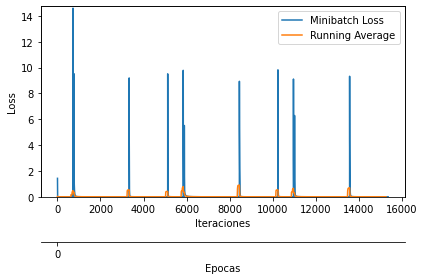

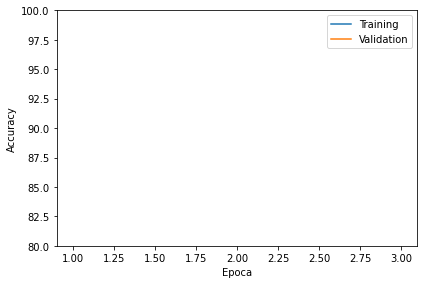

In [69]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCAS,
                   iter_per_epoch=len(train_loader),
                   averaging_iterations=100)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list)
plt.ylim([80, 100])
plt.show()